# Агрегация

Продолжаем работать с таблицей `employees`: 

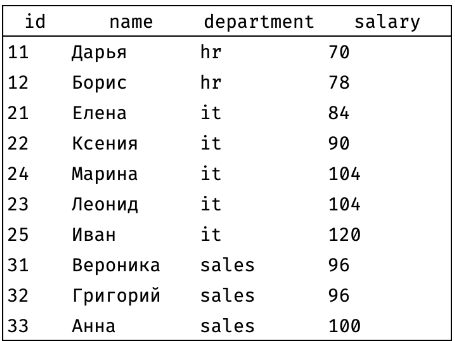

### 7 Сравнение с фондом оплаты труда по городу

Есть таблица сотрудников employees. Мы хотим для каждого сотрудника увидеть, сколько процентов составляет его зарплата от общего фонда труда по городу:

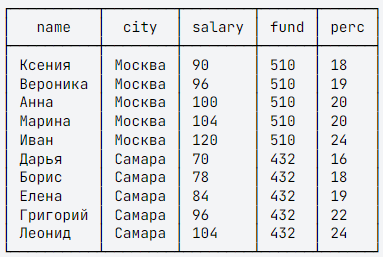

Сортировка результата: city, salary

In [ ]:
SELECT name,
       city, 
       salary,
       SUM(salary) OVER (PARTITION BY city) AS fund,
       ROUND(100.0 * salary / SUM(salary) OVER (PARTITION BY city)) AS perc
  FROM employees   
 ORDER BY city, salary

### 8 Сравнение со средним по департаменту

Есть таблица сотрудников employees. Мы хотим для каждого сотрудника увидеть:
- сколько человек трудится в его отделе (emp_cnt);  
- какая средняя зарплата по отделу (sal_avg);  
- на сколько процентов отклоняется его зарплата от средней по отделу (diff).  

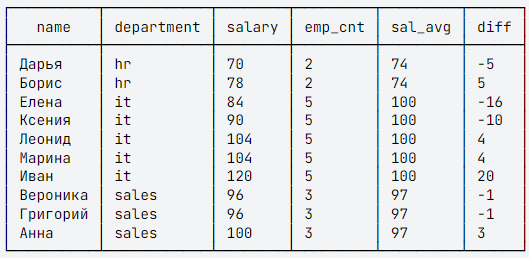

In [ ]:
SELECT name,
       department,
       salary,
       COUNT(name) OVER (PARTITION BY department) AS emp_cnt,
       ROUND(AVG(salary) OVER (PARTITION BY department)) AS sal_avg,
       ROUND(100.0 * (salary - AVG(salary) OVER (PARTITION BY department)) / 
             AVG(salary) OVER (PARTITION BY department)) AS diff
  FROM employees
 ORDER BY department, salary, id

### 9 Порядок выполнения

Есть такой запрос:

In [ ]:
SELECT city,
       department,
       SUM(salary) AS dep_salary,
       SUM(SUM(salary)) OVER (PARTITION BY city) AS x,
       SUM(SUM(salary)) OVER () AS y
  FROM employees
 GROUP BY city, department
 ORDER BY city, department

Что вернет столбец x?

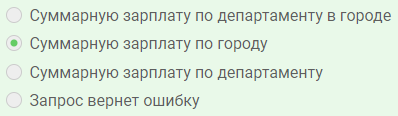

### 10

Есть такой запрос:

In [ ]:
SELECT city,
       department,
       SUM(salary) AS dep_salary,
       SUM(SUM(salary)) OVER (PARTITION BY city) AS x,
       SUM(SUM(salary)) OVER () AS y
  FROM employees
 GROUP BY city, department
 ORDER BY city, department

Что вернет столбец y?

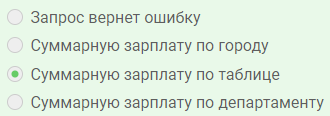